In [104]:
import numpy as np
import pandas as pd
from pandas import Series
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1)Create a function that reverses a string. For example, given the string "forward", your function should return "drawrof". Assume all inputs are strings.

In [105]:
def reverse_string(string):
    return string[::-1]

text = reverse_string("I believe in myself no matter what")
print(text)    

tahw rettam on flesym ni eveileb I


# 2) Complete the function below that can be used to calculate and return the posterior probability of an event A, given the known outcome of Event B using Bayes Theorem:

In [106]:
   """
    Calculates P(A | B) using bayes theorem.

    Args:
        a: P(A)
        b_given_a: P(B | A)
        b_given_not_a: P(B | ~A)

    Returns:
        P(A | B)
    """

 # YOUR CODE GOES HERE
def bayes_theorem(a, b_given_a, b_given_not_a):
    return (b_given_a*a)/((a*b_given_a)+(1-a)*(b_given_not_a))

bayes_theorem(0.3,0.6,0.9)

0.2222222222222222


# 3) a) Analyze the teams dataset from the Lahman baseball records. This dataset contains season statistics for each Major League Baseball team.

In [107]:
lahman_df = pd.read_csv('lahman-teams.csv')

In [108]:
# Let's take a look at the first 5 rows of the team
lahman_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [109]:
# looking at the type of data we are dealing with 
# and the size of the data frame =2805 rows and 48 columns
lahman_df.info()
lahman_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 48 columns):
yearID            2805 non-null int64
lgID              2755 non-null object
teamID            2805 non-null object
franchID          2805 non-null object
divID             1288 non-null object
Rank              2805 non-null int64
G                 2805 non-null int64
Ghome             2406 non-null float64
W                 2805 non-null int64
L                 2805 non-null int64
DivWin            1260 non-null object
WCWin             624 non-null object
LgWin             2777 non-null object
WSWin             2448 non-null object
R                 2805 non-null int64
AB                2805 non-null int64
H                 2805 non-null int64
2B                2805 non-null int64
3B                2805 non-null int64
HR                2805 non-null int64
BB                2805 non-null int64
SO                2685 non-null float64
SB                2661 non-null float64
CS    

(2805, 48)

In [110]:
# Displaying different columns in our dataframe
lahman_df.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')

# a. For all records since 1995, plot histograms for the following variables. Which distribution do they appear to follow? Consider what each variable is measuring along with the histogram's shape. 
 - Stolen bases per game
 - Wins
 - Earned run average

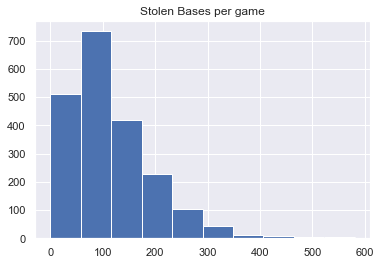

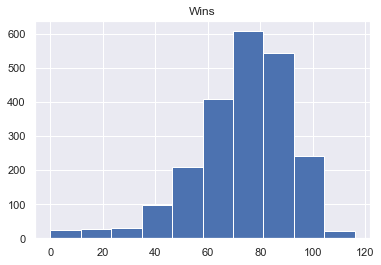

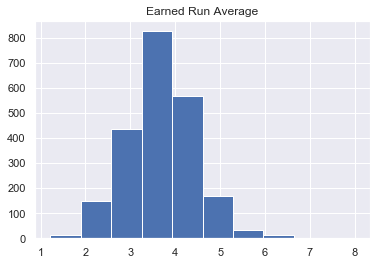

In [111]:
target_year = (lahman_df.yearID <= 1995)
target_year = lahman_df.iloc[target_year.values]

plt.hist(target_year.SB)
plt.title("Stolen Bases per game")
plt.show()

plt.hist(target_year.W)
plt.title("Wins")
plt.show()

plt.hist(target_year.ERA)
plt.title("Earned Run Average")
plt.show()

Looking at the histogram stolen bases is right skeweed, wins is left skeweed, Earned run average seems to be more normal. 

# b) Runs scored has a high correlation of 67.7 percent with winning.

In [112]:
# checking runs scored with winning percentage
lahman_df.R.corr(lahman_df.W)

0.6772428758860842

# b. Conduct some further exploratory data analysis on this dataset. Consider qualities like distributions, correlations and trends over time. Try to find something interesting to say about the data, and use visualizations to support your argument.

In [113]:
# checking corrolation
lahman_df.corr()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,...,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
yearID,1.000000,-0.293981,0.601304,0.341956,0.418790,0.425112,0.273367,0.605436,0.506059,0.683101,...,0.507877,0.884038,0.572311,0.879181,-0.833145,0.517770,0.777934,0.810843,0.002673,-0.007313
Rank,-0.293981,1.000000,-0.171295,-0.085398,-0.732510,0.502550,-0.447966,-0.199481,-0.306493,-0.364275,...,0.046543,-0.173527,0.013765,-0.346624,0.308794,-0.030141,-0.298955,-0.465841,-0.161572,0.117475
G,0.601304,-0.171295,1.000000,0.963764,0.676371,0.661355,0.532620,0.986522,0.867794,0.679297,...,0.858471,0.549978,0.776006,0.641185,-0.494665,0.612708,0.859709,0.405767,0.040381,-0.005753
Ghome,0.341956,-0.085398,0.963764,1.000000,0.358841,0.295313,0.353552,0.904329,0.547261,0.379173,...,0.519463,0.408671,0.370675,0.490309,-0.208608,0.406277,0.319166,0.345927,0.002186,-0.009417
W,0.418790,-0.732510,0.676371,0.358841,1.000000,-0.102111,0.677243,0.689233,0.725160,0.586949,...,0.413214,0.320302,0.380921,0.518630,-0.430352,0.302562,0.644387,0.398222,0.158806,-0.098700
L,0.425112,0.502550,0.661355,0.295313,-0.102111,1.000000,0.028576,0.632149,0.436382,0.339586,...,0.741285,0.453769,0.667285,0.364530,-0.267573,0.354396,0.521540,-0.069461,-0.108156,0.092108
R,0.273367,-0.447966,0.532620,0.353552,0.677243,0.028576,1.000000,0.618912,0.801701,0.692903,...,0.594606,0.387560,0.468324,0.307831,-0.131307,0.474370,0.411579,0.298650,0.233560,0.049879
AB,0.605436,-0.199481,0.986522,0.904329,0.689233,0.632149,0.618912,1.000000,0.919542,0.736695,...,0.884420,0.578579,0.777466,0.633544,-0.480204,0.667970,0.845304,0.435161,0.065986,0.005549
H,0.506059,-0.306493,0.867794,0.547261,0.725160,0.436382,0.801701,0.919542,1.000000,0.817653,...,0.867496,0.515793,0.698237,0.489808,-0.433909,0.611877,0.759347,0.313194,0.145735,0.036564
2B,0.683101,-0.364275,0.679297,0.379173,0.586949,0.339586,0.692903,0.736695,0.817653,1.000000,...,0.722018,0.662841,0.595325,0.615098,-0.569944,0.512153,0.711360,0.540446,0.148488,0.067810


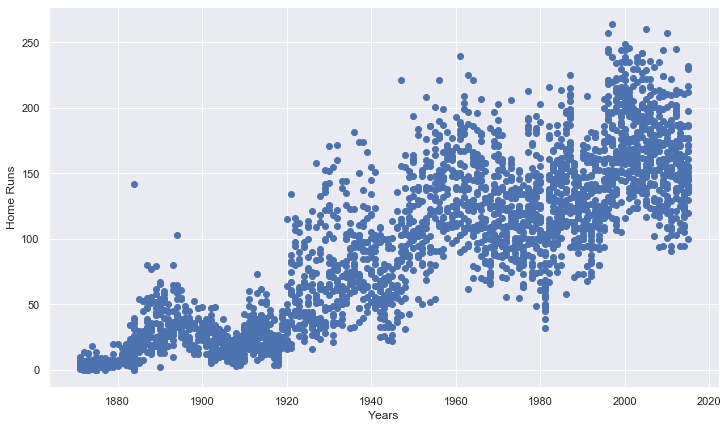

In [114]:
# Home run scatter plot
plt.figure(figsize = (12,7))
plt.scatter(x=lahman_df.yearID, y=lahman_df.HR)
plt.xlabel("Years")
plt.ylabel("Home Runs")
plt.show()

From our scatter plot we see home runs have increased over the years since 1880. We see a spike in 1921 then it gradually increased over the years.

Text(0, 0.5, 'Strike Outs')

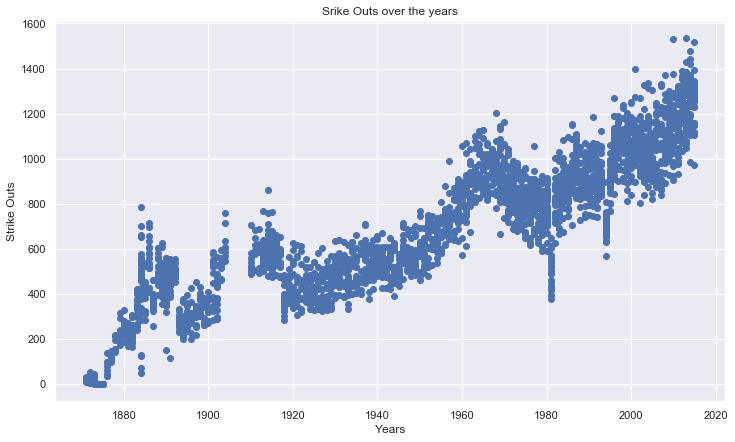

In [115]:
# strike out scatter plot
plt.figure(figsize = (12,7))
plt.scatter(x=lahman_df.yearID, y=lahman_df.SO)
plt.title("Srike Outs over the years")
plt.xlabel("Years")
plt.ylabel("Strike Outs")

With the increased in home runs over the years we also see increased in strike outs also. By 2018 we see a great amount of strike outs compared to the early years. Perhaps not many games were being played during 1880.

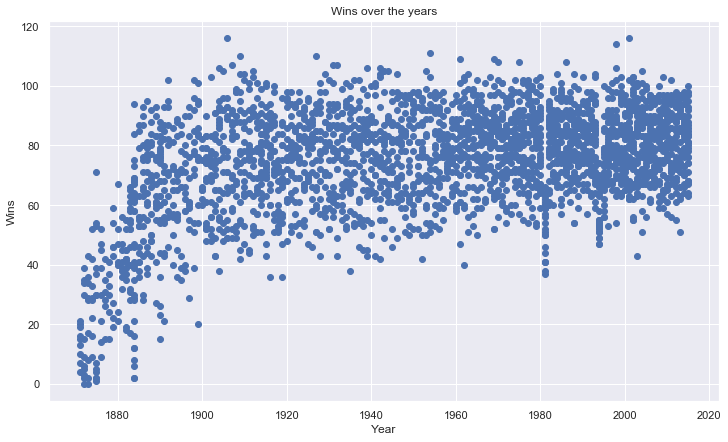

In [116]:
# Wins scatter plot
plt.figure(figsize = (12,7))
plt.scatter(x=lahman_df.yearID, y=lahman_df.W)
plt.xlabel("Year")
plt.ylabel("Wins")
plt.title("Wins over the years")
plt.show()

Since 1880 since have gone up, from 1900 to 2018 we see a steady amount of wins with no huge changes.

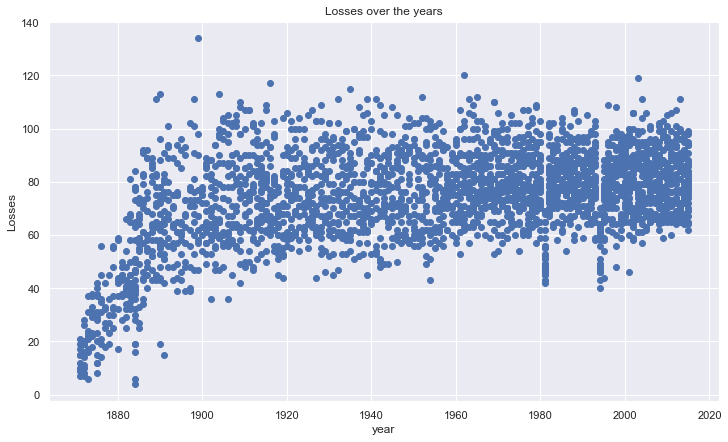

In [117]:
# Losses scatter plot
plt.figure(figsize = (12,7))
plt.scatter(x=lahman_df.yearID, y=lahman_df.L)
plt.title("Losses over the years")
plt.xlabel("year")
plt.ylabel("Losses")
plt.show()

Since 1880 since have gone up, from mid 1900s to 2018 we see a steady amount of losses with no huge changes. Wins and losses are at the same rate.

# Choose any two of the variables from 3. Draw 1,000 samples, taking the mean of 100 observations each time. Plot the frequencies of the sample means. What distribution does this appear to follow?

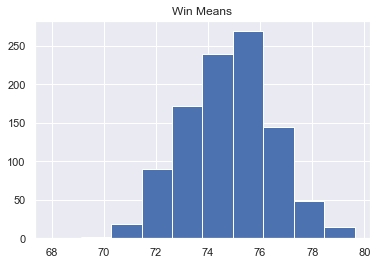

In [118]:
win_means = [np.mean(lahman_df['W'].sample(n=100)) for i in range(1000)]
plt.hist(win_means)
plt.title('Win Means')
plt.show()


Win means seems to be a bit skeweed left, but it its more close to a normal distribution according to our histogram.

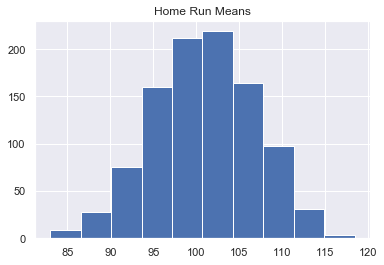

In [119]:
home_run_means = [np.mean(lahman_df['HR'].sample(n=100)) for i in range(1000)]
plt.hist(home_run_means)
plt.title('Home Run Means')
plt.show()

According to our histogram, home run means is perfectly fine this is a great normal distribution.